# Maximum Likelihood Estimation Introduction

**Learning Objectives:** Understand maximum likelihood estimation and how to use it to estimate parameters of probability distributions using observed data.

## Imports

In [46]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Maximum likelihood

Previously, we have seen how to generate data from a probability distribution. Usually the underlying probability distribution depends on some parameters, such as $\mu$ and $\sigma$. As before, let's bundle up those parameters into a vector $\theta = [\theta_0, \theta_1, \ldots]$, so that the probability distribution is $P(\theta)$. If the random variable $x$ is drawn from this distribution, we would write:

$$ x \sim P(\theta) $$

If $x$ is continuous, the **probability density function** would be a function of both $x$, conditional on $\theta$:

$$P(x \mid \theta)$$

We expect this function to integrate to unity:

$$ \int P(x \mid \theta) dx = 1 $$

We have seen previously that **statistical inference** allows us to find an estimate for $\theta$, which we again refer to as $\hat{\theta}$. To do that, we need an **estimator** for $\hat{\theta}$, and preferrable one that has a low mean-squared error. One very here approach for performing such inference is called [maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood). The foundation of this method is to interpret the above probability distribution in slightly different manner. Instead, we introduce the likelihood of a single data point $x$ as:

$$ \mathcal{L}(\theta \mid x) = P(x \mid \theta) $$

This is the *likelihood* of $\theta$ given our data $x$. For multiple, independent samples $[x_0, x_1, \ldots]$ the likelihood is simply the product:

$$ \mathcal{L}(\theta \mid x_0, x_1, \ldots) = \prod_i \mathcal{L}(\theta \mid x_i) = \prod_i P(x_i \mid \theta) $$

The maximum likelihood method consists of finding the value of $\theta$ that maximizes this likelihood $ \mathcal{L}(\theta \mid x_0, x_1, \ldots) $. It is often more natural to maximize the natural log of this function, or the *log-likelihood*:

$$ ln \mathcal{L}(\theta \mid x_0, x_1, \ldots) $$

Or, we can throw in a minus sign and *minimize the negative log-likelihood*:

$$ -ln \mathcal{L}(\theta \mid x_0, x_1, \ldots) = - \sum_i ln P(x_i \mid \theta) $$

Here is an outline of the process in words:

1. Find the PDF of our model.
2. For each observed data point $x_i$ evaluate the PDF at that point.
3. Take its negative natural log.
4. Sum up those values for all data points.
5. Find the value of $\theta$ that minimizes the sum.

## 2. MLE for the normal distribution

Let's see how MLE works for the normal distribution. The probability density function is:

$$ P(x \mid \mu,\sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\left[-\frac{(x-\mu)^2}{2 \sigma^2}\right]}$$

The log-liklihood for a single sample is then:

$$ ln \mathcal{L}(\mu,\sigma^2 \mid x) =  - \frac{1}{2} ln(2 \pi \sigma^2) - \frac{(x-\mu)^2}{2 \sigma^2} $$

For an array of values $[x_1, x_2, \ldots]$ the negative log-likelihood is then:

$$ -ln \mathcal{L}(\mu,\sigma^2 \mid x_1, x_2, \ldots) = \frac{n}{2} ln(2 \pi \sigma^2) + \frac{1}{2 \sigma^2}\sum_{i=1}^n (x_i-\mu)^2 $$

This is the function we need to minimize to find our estimates $\hat{\mu}$ and $\hat{\sigma}^2$.

In [47]:
mu = 5.0
sigma2 = 2.0
data = np.random.normal(mu, np.sqrt(sigma2), 50)

Here is our distribution of generated data:

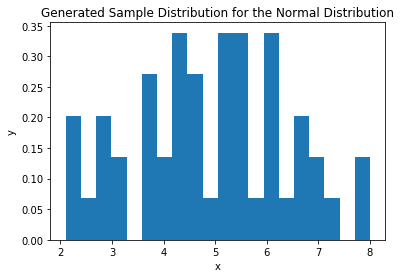

In [48]:
plt.hist(data, bins=20, normed=True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Sample Distribution for the Normal Distribution');

The negative log-likelihood depends on two things: the data and the vector of parameters $\theta$. Let's write a Python function that returns the negative log-likelihood for a value of $\theta$ and an array of observed data:

In [49]:
def neg_log_llh(theta, data):
    """Return the negative log-likelihood for the normal distribution.
    
    Parameters
    ----------
    theta: tuple
        The parameters [mu, sigma**2] of the normal distribution.
    data: ndarray
        An array of data points that are being modelled by the normal distribution.
    """
    mu = theta[0]
    sigma2 = theta[1]
    n = len(data)
    result = 0.5*n*np.log(2.0*np.pi*sigma2) + (1.0/(2.0*sigma2))*np.sum((data-mu)**2)
    return result

In [50]:
neg_log_llh([1.0,1.0], data)

479.0480019957659

### 2.1 Minimization by hand

First, to help us get intuition about this minimzation process, let's try to minimize this by hand using `interact`:

In [51]:
from ipywidgets import interact

In [52]:
def print_log_llh(mu, sigma2):
    print(neg_log_llh((mu, sigma2), data))

In [53]:
interact(print_log_llh, mu=(0.0, 10.0, 0.1), sigma2=(0.1, 10.0, 0.1));

interactive(children=(FloatSlider(value=5.0, description='mu', max=10.0), FloatSlider(value=5.0, description='sigma2', max=10.0, min=0.1), Output()), _dom_classes=('widget-interact',))

### 2.2 Minimization using `scipy.optimize`

The `scipy.optimize` package contains a number of numerical optimization algorithms. In particular, the `minimize` function provides a very general interface to a number of algorithms:

In [54]:
from scipy.optimize import minimize

The `minimize` function takes two arguments:

* A Python function that depends on an array of parameters $\theta$.
* An initial guess for that array of parameters.

The trick in using this for MLE is that our negative log-likelihood depends on both the observed data and parameters. But remember, the whole point is that we already know the data:

In [55]:
data

array([ 2.10050083,  6.13935205,  6.11116119,  5.3025816 ,  6.57701175,
        5.44763696,  5.27047997,  4.6872846 ,  4.54511358,  5.58383849,
        3.64630632,  2.38136421,  5.34016793,  6.04728042,  5.1514908 ,
        2.93341037,  3.97965277,  4.21088698,  5.41223823,  5.83673974,
        4.85654338,  6.32098933,  6.9905069 ,  4.34404638,  2.63091757,
        2.2825338 ,  5.54673972,  6.94600969,  3.81654039,  3.89299975,
        4.34182862,  5.25830147,  7.78897148,  2.9319309 ,  3.64921081,
        4.58349329,  3.57927846,  7.25189337,  5.36887912,  8.00706088,
        6.73255604,  3.09902992,  4.38633909,  5.96048381,  4.63694125,
        4.40225664,  6.56692794,  2.993174  ,  5.97883263,  2.92466066])

To get a function of just $\theta$, you can create a lambda that is a closure over the data and pass that as the first argument to `minimize`:

In [56]:
fit = minimize(lambda theta: neg_log_llh(theta, data), [4.0,2.0])
fit

      fun: 90.074551093132
 hess_inv: array([[ 0.043554  , -0.00033798],
       [-0.00033798,  0.18460015]])
      jac: array([  0.00000000e+00,  -9.53674316e-07])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([ 4.89548751,  2.14921986])

The estimated parameters are stored in the `x` attribute of the result:

In [57]:
print('mu:       ', fit.x[0])
print('sigma**2: ', fit.x[1])

mu:        4.89548750828
sigma**2:  2.14921986083


Here are the true values we are estimating:

In [58]:
print('mu:       ', mu)
print('sigma**2: ', sigma2)

mu:        5.0
sigma**2:  2.0


For the case of the normal distribution, the sample mean and variance are also estimators for these parameters:

In [59]:
print('sample mu:      ', data.mean())
print('sample sigma**2:', data.var())

sample mu:       4.89548752164
sample sigma**2: 2.14921998216


Notice how the MLE values are almost identical. This is because the MLE approach an be used to analytically derive these estimators, by taking derivatives of the negative log-likelihood.

### 2.3 Minimization using `scipy.stats`

The `scipy.stats` modules has a set of nice objects that represent different probability distributions. These objects go beyond the capabilities in `numpy.random` and provide:

* Methods to evaluate the PMF or PDF.
* Methods to evaluate the log-likelihood.
* Methods to fit the MLE on data.
* Many others.

For more information, see the `scipy.stats` [documentation](https://docs.scipy.org/doc/scipy-0.18.1/reference/stats.html).

For now, lets look at the normal distribution:

In [60]:
from scipy.stats import norm

If the parameters are known, you can create an object that represents the distributions with those parameters fixed:

In [61]:
N = norm(mu, np.sqrt(sigma2))

Then you can use various methods to query the distribution (with those parameters fixed). Here is the PDF $P(x)$ evaluated at $x=1.0$:

In [62]:
N.pdf(1.0)

0.0051667463385230176

And the natural log of the pdf (which is useful in MLE):

In [63]:
N.logpdf(1.0)

-5.2655121234846449

Like `numpy.random.rand` we can also generate samples:

In [64]:
N.rvs(10)

array([ 7.51057758,  6.36476531,  4.33983582,  2.59425274,  5.42743955,
        8.1665196 ,  6.67834238,  7.16961793,  5.87674665,  7.07729757])

Again, all of these usage case assume we have fixed the parameters at the beginning by instantiating the norm object using `norm(parameters...)`. We can also perform MLE given known data using the `fit` method:

In [65]:
mu_hat, sigma_hat = norm.fit(data)

It is important to note that the MLE here returns an estimate for $\sigma$ rather than $\sigma^2$. But the values are the same as above:

In [66]:
print('sample mu:      ', mu_hat)
print('sample sigma**2:', sigma_hat**2)

sample mu:       4.89548752164
sample sigma**2: 2.14921998216


### 2.4 Minimization using TensorFlow

Finally, let's perform MLE using TensorFlow. While this is overkill, it shows the general pattern that we are going to use in all modelling situations:

1. Pick a model $M$ with parameters $\theta$.
2. Pick a Performance Metric $P$ that we wish to minimize/maximize.
3. Use an optimization algorithm to find the estimated parameter vector $\hat{\theta}$ that minimizes/maximizes $P$.
4. Use the estimated parameter vector $\hat{\theta}$ with the model.

In [42]:
import tensorflow as tf
from tensorflow.contrib import distributions as dist

Our first step is to create a model that represents the normal distribution and MLE on its parameters:

In [46]:
dist.Normal??

In [52]:
mu = tf.Variable(1.0, dtype=tf.float64)     # Parameter
sigma = tf.Variable(1.0, dtype=tf.float64) # Parameter
x = tf.placeholder(dtype=tf.float64)       # Use a placeholder to represent observed data
model = dist.Normal(mu, sigma)       # Normal distribution
nll = tf.reduce_sum(-1.0*model.log_pdf(x))  # Performance metric = negative log-likelihood

Now do the standard initialization of the TensorFlow `Session`:

In [57]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

Now we need to train our model by minimizing the negative log-likelihood. To do this, we need to instantiate an optimizer from `tf.train`. In this case we will use a `GradientDescentOptimizer` with a learning rate of `0.01`. The [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) optimization algorithm works well with large datasets and large numbers of parameters. In our case, it is overkill, but it is nonetheless useful to see how it works for later usage:

In [58]:
optimizer = tf.train.GradientDescentOptimizer(0.01)

In [59]:
train = optimizer.minimize(nll)

Lastly, we will train our model. Conceptually, the gradient descent algorithm computes the gradient of the performance metric with respect to the parameters. It then takes a step in the most downhill direction. The optimization API for the `GradientDescentOptimizer` reflects this step-wise approach so we have to take 100 steps explicitly:

In [60]:
for i in range(1000):
    sess.run(train, {x: data})

After we have trained the model, we can run the computational graph for $\hat{\mu}$ and $\hat{\sigma}$ itself:

In [61]:
sess.run([mu, sigma])

[4.8010652773425537, 1.3323128800523563]

We can also look at the value of our performance metric:

In [64]:
sess.run(nll, {x: data})

85.292748633678798

The power here is that we have a single, uniform API (`Session.run`) for querying about the model. Amazingly, this same API can be used to train a wide range of models, including state of the art deep neural networks.